In [3]:
from PIL import Image
import pymeanshift as pms
import cv2
import matplotlib.pyplot as plt
import numpy as np


In [4]:
img = cv2.imread("image3.jpg")
(segmented_image, labels_image, number_regions) = pms.segment(img,
                                                              spatial_radius=6,
                                                              range_radius=4.5,
                                                              min_density=50
                                                )
print(segmented_image.shape)
print(labels_image)
print(number_regions)
# plt.imshow(segmented_image[...,::-1])


(512, 512, 3)
[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [89 89 89 ... 89 89 89]
 [89 89 89 ... 89 89 89]
 [89 89 89 ... 89 89 89]]
90


Object 0: area = 4961, centroid = (114.11509776254788, 217.84337835113888), mean intensity = [ 58.55694416 233.96754687 239.57387623], bbox = (75, 179, 154, 258)
Object 2: area = 3522, centroid = (160.38813174332765, 93.42163543441227), mean intensity = [253.57353776 250.6036343  244.47898921], bbox = (129, 52, 187, 137)
Object 32: area = 135, centroid = (424.6148148148148, 88.28148148148148), mean intensity = [ 49.17777778 189.71111111 231.23703704], bbox = (416, 80, 434, 98)
Object 39: area = 63, centroid = (424.0, 165.0), mean intensity = [3.42857143 2.84126984 4.3968254 ], bbox = (421, 161, 428, 170)
Object 52: area = 85, centroid = (439.9529411764706, 92.69411764705882), mean intensity = [ 63.4        144.6         84.65882353], bbox = (435, 86, 444, 101)
Object 55: area = 154, centroid = (441.46753246753246, 387.012987012987), mean intensity = [233.96103896 230.35714286 192.9025974 ], bbox = (437, 378, 448, 396)
Object 56: area = 75, centroid = (441.4, 400.96), mean intensity = [

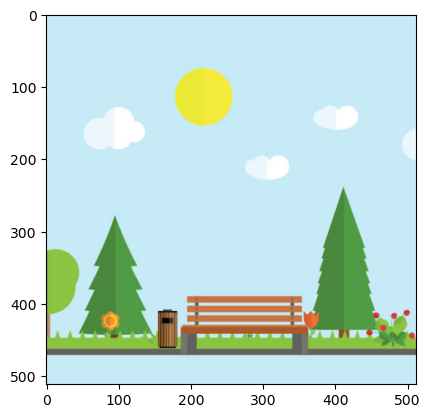

In [5]:
from skimage import measure
props = measure.regionprops(labels_image, intensity_image=img)

# filter regions based on size and shape
min_area = 50  # minimum area of an object in pixels
max_eccentricity = 0.8  # maximum eccentricity of an object
objects = []
for i, prop in enumerate(props):
    if prop.area >= min_area and prop.eccentricity <= max_eccentricity:
        objects.append({
            'label': i,
            'area': prop.area,
            'centroid': prop.centroid,
            'bbox': prop.bbox,
            'mean_intensity': prop.mean_intensity,
            'min_intensity': prop.min_intensity,
            'max_intensity': prop.max_intensity
        })

# display or use the object information
for obj in objects:
    print(f"Object {obj['label']}: area = {obj['area']}, centroid = {obj['centroid']}, mean intensity = {obj['mean_intensity']}, bbox = {obj['bbox']}")
plt.imshow(img[...,::-1])

In [13]:
#jpg to png
import cv2

# Read the JPEG image
img = cv2.imread("image3.jpg")

# Convert the JPEG image to PNG format
cv2.imwrite('image3.png', img)


True

In [14]:
# obj_label = random.choice(change_objects_label)
obj_label = 0
# create a binary mask for the object by thresholding the labels image
mask = np.ones(img.shape[:2], dtype=np.uint8) * 255

mask[labels_image==(obj_label+1)] = 1


In [15]:
x, y, w, h = 179, 75, 100, 100

# Create a mask with all pixels set to 1 (white)
mask = np.ones(img.shape[:2], dtype=np.uint8) * 255

# Set the pixels corresponding to the object to 0 (black)
cv2.rectangle(mask, (x, y), (x+w, y+h), 0, -1)

# Erase the object from the input image
# Save the modified image and the mask
cv2.imwrite('mask3.jpg', mask)

True

In [31]:
# fig = plt.figure(figsize=(200,200))
# ax = fig.add_axes([0, 0, 1, 2])

# ax.imshow(img[...,::-1])
# ax.imshow(new_img[...,::-1])
# plt.show()
cv2.imwrite('mask3.jpg', mask)
# cv2.imwrite("output.jpg", new_img)

True

In [64]:
import PIL
from PIL import Image
import requests
from io import BytesIO
from PIL import ImageFilter
from PIL import ImageEnhance
from IPython.display import display
import numpy as np

In [37]:
copyimg = img.copy()
label_to_change = 28
tmp = labels_image.copy()

object_color = (0, 0, 255)  # red color

# Set the pixel values of the object to the desired color using NumPy indexing
copyimg[labels_image == (label_to_change+1)] = object_color


# Drawing bbox
bbox = []
for obj in objects:
    if (obj['label'] == label_to_change):
        bbox = obj['bbox']
copyimg = cv2.rectangle(copyimg, (bbox[1], bbox[0]), (bbox[3], bbox[2]), (255, 0, 0), 2)
print(tmp == labels_image)

# Display the image with the colored object
cv2.imwrite('output1.jpg', copyimg)

[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]


True

In [17]:
import cv2
import numpy as np

copyimg = cv2.imread("test3.jpg")
# Load the image and create a binary mask indicating the object to remove
mask = np.zeros(img.shape[:2], dtype=np.uint8)
# mask[bbox[0]:bbox[2], bbox[1]:bbox[3]] = 255  # example mask
x, y, w, h = 179, 75, 100, 100
mask[y:y+h, x:x+w] = 255  # example mask

# Set the pixels corresponding to the object to the background color
background_color = (0, 0, 0)  # black color
copyimg[mask != 0] = background_color

# Display the resulting img with the object removed
cv2.imwrite('output1.jpg', copyimg)


True

(574, 1323, 651, 1420)
(615.1543119266055, 1370.7836697247706) (574, 1323, 651, 1420) 244
245


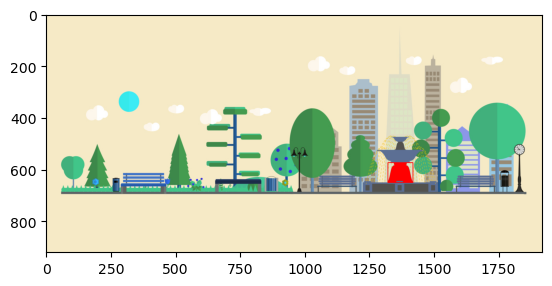

In [146]:
# choose a label to change the color of
label_to_change = 244
copyimg = img.copy()
copyimg2 = img.copy()

# loop over the objects and check if the label matches the one we want to change
for obj in objects:
    if obj['label'] == label_to_change:
        bbox = obj['bbox']
        centroid = obj['centroid']
        new_color = [255,0,0]  # this will make the object red

        print(bbox)
        start_point = (bbox[1], bbox[0])
  
        # Ending coordinate, here (220, 220)
        # represents the bottom right corner of rectangle
        end_point = (bbox[3], bbox[2])
        
        # Blue color in BGR
        color = (255, 0, 0)
        
        # Line thickness of 2 px
        thickness = 2
        copyimg2 = cv2.rectangle(copyimg2, start_point, end_point, color, thickness)
        # Using cv2.rectangle() method
        print(centroid, bbox, label_to_change)
        print(labels_image[615][1370])
        # Draw a rectangle with blue line borders of thickness of 2 px
        for x in range(bbox[1], bbox[3]):
            for y in range(bbox[0], bbox[2]):
                if (labels_image[y][x] == 245):
                    copyimg2[y][x] = new_color
                if (labels_image[y][x] == 244):
                    print("object detected")
                # else:
                    # print(x, y, labels_image[y][x])
                    

        break
                
        
plt.imshow(copyimg2)


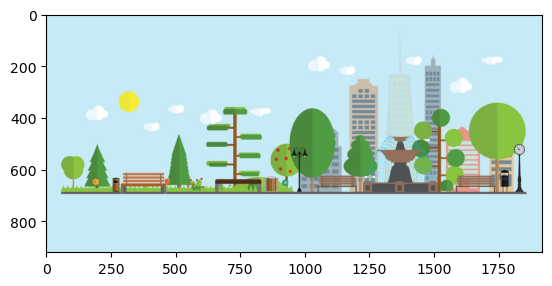

In [9]:
import numpy as np

# assume that we have already segmented the image and extracted object information
# objects is a list of dictionaries containing object properties, including 'label' and 'bbox'

# create a new image with the same size as the original image
new_img = img.copy()

# set the pixels inside the bounding box of each object to a new color
new_color = (255, 255, 255)  # new color in RGB format
for obj in objects:
    
    # obj = objects[i]
    label = obj['label']
    bbox = obj['bbox']
    default_color = img[bbox[0]:bbox[2], bbox[1]:bbox[3]][labels_image[bbox[0]:bbox[2], bbox[1]:bbox[3]] == label]
    # if i  == 100000:
    #   new_img[bbox[0]:bbox[2], bbox[1]:bbox[3]][labels_image[bbox[0]:bbox[2], bbox[1]:bbox[3]] == label] = new_color
    # else:
    new_img[bbox[0]:bbox[2], bbox[1]:bbox[3]][labels_image[bbox[0]:bbox[2], bbox[1]:bbox[3]] == label] = new_color


# display the new image
plt.imshow(new_img[...,::-1])

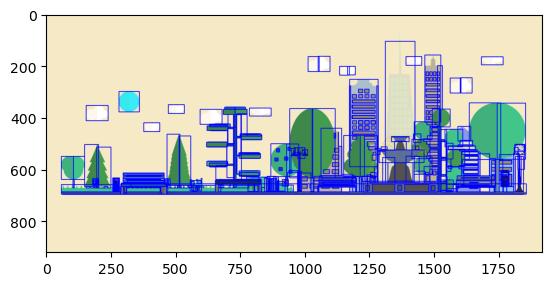

In [10]:
from skimage.measure import regionprops

# assume that we have already segmented the image and extracted object information
# labels_image is an integer-labeled image of the same size as the input image

# create a copy of the input image
img_copy = img.copy()

# loop over each labeled region in the segmented image
for region in regionprops(labels_image):
    # skip background regions (label=0)
    if region.label == 0:
        continue
    # extract the bounding box coordinates for the region
    minr, minc, maxr, maxc = region.bbox
    # draw a red bounding box around the region
    cv2.rectangle(img_copy, (minc, minr), (maxc, maxr), (0, 0, 255), 2)

# display the annotated image
plt.imshow(img_copy)

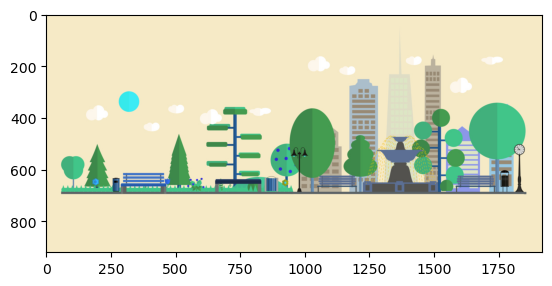

In [11]:
plt.imshow(img)

In [ ]:
(299, 282, 378, 361)

In [2]:
import numpy as np
import cv2
img = cv2.imread("image.jpg")

# Set up initial mask
mask = np.zeros(img.shape[:2], np.uint8)

# Set up background and foreground models
bgdModel = np.zeros((1,65), np.float64)
fgdModel = np.zeros((1,65), np.float64)

# Define the rectangle enclosing the object
rect = (282, 299, 361-282, 378-299)

# Perform GrabCut segmentation
cv2.grabCut(img, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)


(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[7.27828493e-01, 4.64507477e-02, 1.29084673e-01, 5.02971833e-02,
         4.63389030e-02, 2.46000000e+02, 2.34000000e+02, 1.98000000e+02,
         6.51113949e+01, 1.87419888e+02, 1.31307858e+02, 2.06385884e+02,
         2.06435294e+02, 1.86676741e+02, 6.46213766e+01, 1.46379572e+02,
         7.71397756e+01, 7.70740750e+01, 9.66673732e+01, 1.21605281e+02,
         1.00000000e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         1.00000000e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         1.00000000e-02, 9.96038411e+00, 2.28339023e+00, 4.07283553e+00,
         2.28339023e+00, 1.13459442e+02, 7.36173027e+01, 4.07283553e+00,
         7.36173027e+01, 5.73108483e+01, 2.10394760e+03, 1.57046644e+03,
         1.02475093e+03, 1.57046644e+03, 1.4

In [5]:
# Create a mask where foreground pixels are 1 and background pixels are 0
mask2 = np.where((mask==1) + (mask==3), 255, 0).astype('uint8')
print(mask2)
# Invert the mask
mask_inv = cv2.bitwise_not(mask2)

# Apply the mask to the original image to remove the object
result = cv2.bitwise_and(img, img, mask=mask_inv)

# Save the result
cv2.imwrite('result.png', result)


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


True

In [6]:
import torch
from torchvision import transforms
from torchvision.utils import save_image
from models import ContextEncoder

# Set up the pre-trained Context Encoder model
model = ContextEncoder()
model.load_state_dict(torch.load('path/to/weights.pth'))

# Set up the input image
input_image_path = 'path/to/input_image.jpg'
input_image = Image.open(input_image_path)

# Preprocess the input image
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
])
input_tensor = transform(input_image).unsqueeze(0)

# Use the model to remove the object
with torch.no_grad():
    output_tensor = model(input_tensor)

# Save the output image
output_image_path = 'path/to/output_image.jpg'
output_image = transforms.ToPILImage()(output_tensor.squeeze())
output_image.save(output_image_path)


/tmp/ipykernel_73894/4014574316.py:19: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  markers = peak_local_max(grad, indices=False, footprint=np.ones((3, 3)))
